# Bibliotecas e Dados

In [ ]:
!pip install kagglehub

In [ ]:
#Bibliotecas

import pandas as pd
import os
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import requests
import kagglehub
import seaborn as sns

In [ ]:
#Importando o DataSet via Kaggle
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")
print("Path to dataset files:", path)

100%|██████████| 6.14M/6.14M [00:00<00:00, 69.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23


In [ ]:
directory_path = '/root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23'

# Listando os arquivos no diretório
files = os.listdir(directory_path)
print("Arquivos disponíveis:", files)


Arquivos disponíveis: ['races.csv', 'status.csv', 'results.csv', 'lap_times.csv', 'constructor_results.csv', 'qualifying.csv', 'sprint_results.csv', 'circuits.csv', 'pit_stops.csv', 'driver_standings.csv', 'constructor_standings.csv', 'drivers.csv', 'seasons.csv', 'constructors.csv']


# Conhecendo os Dados

In [ ]:
#Identificando Pilotos Brasileiros
drivers_df = pd.read_csv(directory_path + '/drivers.csv')
brazilian_df = drivers_df[drivers_df['nationality'] == 'Brazilian']
brazilian_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
11,12,piquet_jr,\N,PIQ,Nelson,Piquet Jr.,1985-07-25,Brazilian,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr."
12,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
21,22,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
40,41,zonta,\N,ZON,Ricardo,Zonta,1976-03-23,Brazilian,http://en.wikipedia.org/wiki/Ricardo_Zonta
41,42,pizzonia,\N,PIZ,Antônio,Pizzonia,1980-09-11,Brazilian,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...
42,43,matta,\N,\N,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
53,54,burti,\N,\N,Luciano,Burti,1975-03-05,Brazilian,http://en.wikipedia.org/wiki/Luciano_Burti
57,58,marques,\N,\N,Tarso,Marques,1976-01-19,Brazilian,http://en.wikipedia.org/wiki/Tarso_Marques
58,59,bernoldi,\N,\N,Enrique,Bernoldi,1978-10-19,Brazilian,http://en.wikipedia.org/wiki/Enrique_Bernoldi
63,64,diniz,\N,\N,Pedro,Diniz,1970-05-22,Brazilian,http://en.wikipedia.org/wiki/Pedro_Diniz


In [ ]:
# Entendendo a disposição da base de dados de voltas

laps_df =pd.read_csv(directory_path + '/lap_times.csv')
laps_df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


In [ ]:
# Entendendo a disposição da base de dados de circuitos

circuits_df = pd.read_csv(directory_path + '/circuits.csv')
circuits_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


In [ ]:
# Entendendo a disposição da base de dados de corridas

race_df = pd.read_csv(directory_path + '/races.csv')
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [ ]:
# Identificando onde ocorreu cada corrida

# Mesclando os DataFrames
races_and_circuits_df = pd.merge(
    race_df,
    circuits_df[['circuitId', 'name', 'location', 'country']],
    on='circuitId',
    how='left'
)

# Removendo colunas indesejadas
races_and_circuits_df = races_and_circuits_df.drop(columns=[
    'date', 'time', 'url',
    'fp1_date', 'fp1_time',
    'fp2_date', 'fp2_time',
    'fp3_date', 'fp3_time',
    'quali_date', 'sprint_date',
    'sprint_time', 'quali_time'
])

races_and_circuits_df


,raceId,year,round,circuitId,name_x,name_y,location,country
0,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,2009,2,2,Malaysian Grand Prix,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,2009,3,17,Chinese Grand Prix,Shanghai International Circuit,Shanghai,China
3,4,2009,4,3,Bahrain Grand Prix,Bahrain International Circuit,Sakhir,Bahrain
4,5,2009,5,4,Spanish Grand Prix,Circuit de Barcelona-Catalunya,Montmeló,Spain
...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,Autódromo Hermanos Rodríguez,Mexico City,Mexico
1121,1141,2024,21,18,São Paulo Grand Prix,Autódromo José Carlos Pace,São Paulo,Brazil
1122,1142,2024,22,80,Las Vegas Grand Prix,Las Vegas Strip Street Circuit,Las Vegas,United States
1123,1143,2024,23,78,Qatar Grand Prix,Losail International Circuit,Al Daayen,Qatar


In [ ]:
# Identificando voltas dos pilotos


# Mesclando os DataFrames

laps_and_drivers_df = pd.merge(laps_df, drivers_df[['driverId', 'driverRef', 'surname', 'nationality']], on='driverId', how='left')
laps_and_drivers_df

,raceId,driverId,lap,position,time,milliseconds,driverRef,surname,nationality
0,841,20,1,1,1:38.109,98109,vettel,Vettel,German
1,841,20,2,1,1:33.006,93006,vettel,Vettel,German
2,841,20,3,1,1:32.713,92713,vettel,Vettel,German
3,841,20,4,1,1:32.803,92803,vettel,Vettel,German
4,841,20,5,1,1:32.342,92342,vettel,Vettel,German
...,...,...,...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742,sargeant,Sargeant,American
575025,1131,858,66,19,1:10.855,70855,sargeant,Sargeant,American
575026,1131,858,67,19,1:12.454,72454,sargeant,Sargeant,American
575027,1131,858,68,19,1:13.607,73607,sargeant,Sargeant,American


In [ ]:
# Data Frame sobre Voltas e Circuitos

full_races_df = pd.merge(races_and_circuits_df, laps_and_drivers_df, on='raceId', how='left')
full_races_df

,raceId,year,round,circuitId,name_x,name_y,location,country,driverId,lap,position,time,milliseconds,driverRef,surname,nationality
0,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,1.0,1.0,13.0,1:49.088,109088.0,hamilton,Hamilton,British
1,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,1.0,2.0,12.0,1:33.740,93740.0,hamilton,Hamilton,British
2,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,1.0,3.0,11.0,1:31.600,91600.0,hamilton,Hamilton,British
3,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,1.0,4.0,10.0,1:31.067,91067.0,hamilton,Hamilton,British
4,1,2009,1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,1.0,5.0,10.0,1:32.129,92129.0,hamilton,Hamilton,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575618,1140,2024,20,32,Mexico City Grand Prix,Autódromo Hermanos Rodríguez,Mexico City,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575619,1141,2024,21,18,São Paulo Grand Prix,Autódromo José Carlos Pace,São Paulo,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575620,1142,2024,22,80,Las Vegas Grand Prix,Las Vegas Strip Street Circuit,Las Vegas,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575621,1143,2024,23,78,Qatar Grand Prix,Losail International Circuit,Al Daayen,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Inferências

In [ ]:
num_brazilian_racers = len(brazilian_df)
print(f"{num_brazilian_racers} Pilotos Brasileiros já pilotaram na fórmula 1.")

32 Pilotos Brasileiros já pilotaram na fórmula 1.


In [ ]:
# Ranqueando as nacionalidades que mais deram voltas

laps_by_nationality = full_races_df.groupby('nationality')['lap'].count().reset_index()
laps_by_nationality.rename(columns={'lap': 'total_laps'}, inplace=True)
print(laps_by_nationality.sort_values(by=['total_laps'], ascending=False))

      nationality  total_laps
15         German       91687
6         British       83228
13        Finnish       47073
5       Brazilian       46662
14         French       43242
29        Spanish       40863
20        Italian       34923
2      Australian       26623
7        Canadian       19975
21       Japanese       19018
12          Dutch       18832
23        Mexican       17864
28        Russian       10947
11         Danish       10405
3        Austrian        7796
24     Monegasque        7166
26         Polish        5505
32           Thai        5079
9       Colombian        4917
30        Swedish        4901
33     Venezuelan        4507
0        American        3262
4         Belgian        3250
8         Chinese        2933
17         Indian        2777
27     Portuguese        2654
31          Swiss        2579
1       Argentine        1870
25  New Zealander        1471
16      Hungarian         959
22      Malaysian         645
19          Irish         639
18     Ind

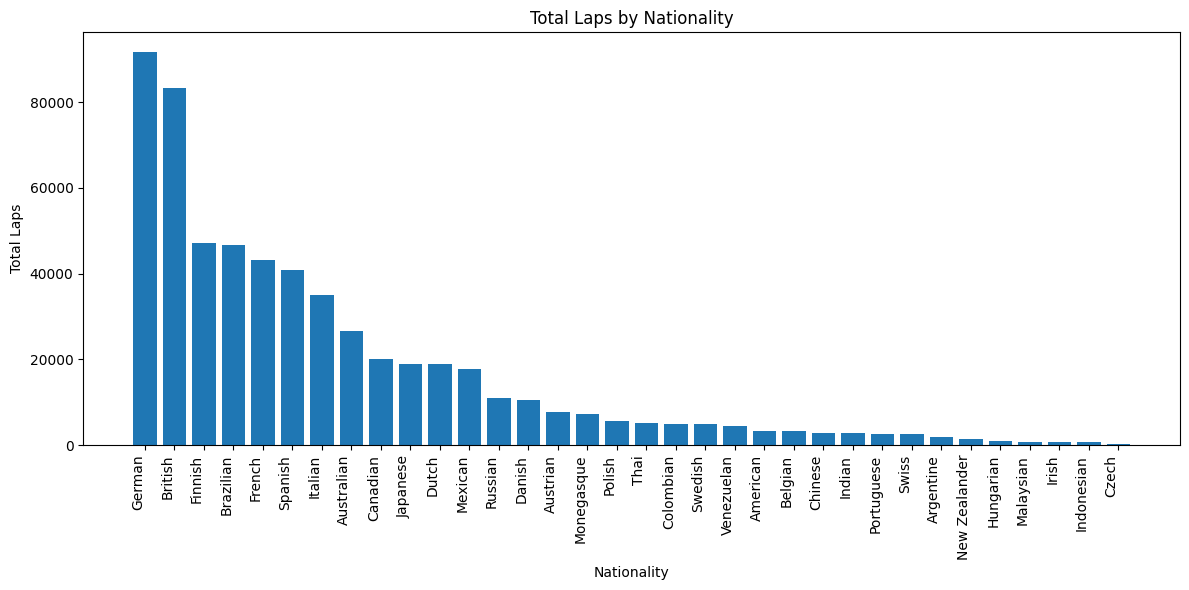

In [ ]:
laps_by_nationality = laps_by_nationality.sort_values(by=['total_laps'], ascending=False)

# Gráfico das Nacionalidades
plt.figure(figsize=(12, 6))
plt.bar(laps_by_nationality['nationality'], laps_by_nationality['total_laps'])
plt.xlabel('Nationality')
plt.ylabel('Total Laps')
plt.title('Total Laps by Nationality')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Comportamento do Brasil

brazilian_laps_df = full_races_df.loc[full_races_df['nationality'] == 'Brazilian']
min_lap_time = brazilian_laps_df['time'].min()

# Identificando a menor volta (Volta mais rápida)
min_lap_row = brazilian_laps_df.loc[brazilian_laps_df['time'] == min_lap_time]

race_id_min_lap = min_lap_row['raceId'].values[0]

# Nome do GP
grand_prix_name = races_and_circuits_df.loc[races_and_circuits_df['raceId'] == race_id_min_lap, 'name_y'].values[0]

# Nome do Piloto

drivers_name = min_lap_row['driverRef'].values[0]

print(f"A volta mais rápida foi feita em: {min_lap_time} segundos. No Grande Prêmio do {grand_prix_name}, pelo {drivers_name} ")

A volta mais rápida foi feita em: 0:57.742 segundos. No Grande Prêmio do Bahrain International Circuit, pelo pietro_fittipaldi 


In [ ]:
# Identificando o maior número de qualificações executadas por brasileiros

qualy_df = pd.read_csv(directory_path + '/qualifying.csv')
qualy_drivers_df = pd.merge(qualy_df, drivers_df[['driverId', 'driverRef', 'surname', 'nationality']], on='driverId', how='left')
br_qualy_drivers_df = qualy_drivers_df.loc[qualy_drivers_df['nationality'] == 'Brazilian']

qualy_counts = br_qualy_drivers_df.groupby('driverRef')['qualifyId'].count().reset_index()
qualy_counts.rename(columns={'qualifyId': 'num_qualifying_sessions'}, inplace=True)


qualy_counts = qualy_counts.sort_values(by='num_qualifying_sessions', ascending=False)
print(qualy_counts)
# Obs: Acredito que a base não esteja completa com esse dado, visto que o Ayrton Senna executou várias qualificações

            driverRef  num_qualifying_sessions
7               massa                      257
0         barrichello                      226
3               diniz                       48
2         bruno_senna                       46
10               nasr                       40
12          piquet_jr                       28
8               matta                       28
13           pizzonia                       20
5              grassi                       19
9              moreno                       17
4          fittipaldi                       15
14             rosset                       13
16              zonta                       11
6             marques                        5
15              senna                        3
1            bernoldi                        2
11  pietro_fittipaldi                        2


In [ ]:
br_qualy_drivers_df

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,driverRef,surname,nationality
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,massa,Massa,Brazilian
10,11,18,22,11,17,11,1:26.369,1:26.173,\N,barrichello,Barrichello,Brazilian
20,21,18,12,4,6,21,1:28.330,\N,\N,piquet_jr,Piquet Jr.,Brazilian
22,23,19,13,6,2,1,1:35.347,1:34.412,1:35.748,massa,Massa,Brazilian
34,35,19,12,4,6,13,1:36.074,1:35.562,\N,piquet_jr,Piquet Jr.,Brazilian
...,...,...,...,...,...,...,...,...,...,...,...,...
7467,7490,986,13,3,19,11,1:18.570,1:18.099,\N,massa,Massa,Brazilian
7485,7508,987,13,3,19,10,1:09.789,1:09.612,1:09.841,massa,Massa,Brazilian
7505,7529,988,13,3,19,10,1:38.629,1:38.565,1:38.550,massa,Massa,Brazilian
8673,8714,1046,850,210,51,20,0:55.426,\N,\N,pietro_fittipaldi,Fittipaldi,Brazilian


In [ ]:
# Identificando os brasileiros com mais "Pole Position"

pole_positions_df = br_qualy_drivers_df[br_qualy_drivers_df['position'] == 1]

pole_counts = pole_positions_df.groupby('driverRef')['qualifyId'].count().reset_index()
pole_counts.rename(columns={'qualifyId': 'num_pole_positions'}, inplace=True)

pole_counts = pole_counts.sort_values(by='num_pole_positions', ascending=False)
print(pole_counts)

     driverRef  num_pole_positions
1        massa                  16
0  barrichello                  10
2        senna                   3


In [ ]:
# Identificando pontuação por equipe

race_constructor_standings_df = pd.read_csv(directory_path + '/constructor_standings.csv')
race_constructor_standings_df

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13266,28848,1132,15,0.0,10,10,0
13267,28849,1132,210,27.0,7,7,0
13268,28850,1132,215,31.0,6,6,0
13269,28851,1132,3,4.0,9,9,0


In [ ]:
# Identificando resultados
results_df = pd.read_csv(directory_path + '/results.csv')
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [ ]:

# Mesclando com os pilotos para identificação de pontuação individual
results_with_nationality = pd.merge(results_df, drivers_df[['driverId', 'nationality']], on='driverId', how='left')

# Filtrando brasileiros
brazilian_results = results_with_nationality[results_with_nationality['nationality'] == 'Brazilian']

# Identificando pontuação dos pilotos brasileiros por equipe (e a soma dos pontos)
constructor_points = brazilian_results.groupby(['constructorId', 'driverId'])['points'].sum().reset_index()

# Achando o máximo de pontos por construtor
max_points_by_constructor = constructor_points.loc[constructor_points.groupby('constructorId')['points'].idxmax()]

print(max_points_by_constructor)

    constructorId  driverId  points
0               1       102   451.0
3               3        13   351.0
9               4        12    19.0
11              6        13   789.0
15              7        43    13.0
16             11        22    41.0
19             15       831    29.0
20             16        41     3.0
21             17        22    46.0
27             18       104     6.0
28             19        42     0.0
30             20        54     0.0
32             21        64     5.0
35             22       137    70.5
36             23        22    77.0
37             24        22    31.0
38             25        73     0.0
39             26        73     0.0
40             27        64     2.0
42             28        64     0.0
45             29       104     6.0
47             32       102   150.0
50             34       137   233.0
53             37       127     9.0
57             38        90     0.0
58             39        90     1.0
59             41       127 

In [ ]:
# Traduzindo os ID's para nomes de pilotos e equipes

constructor_df = pd.read_csv(directory_path + '/constructors.csv')
constructors_df = pd.merge(max_points_by_constructor, constructor_df[['constructorId', 'name']], on='constructorId', how='left')
max_points_with_names = pd.merge(max_points_by_constructor, drivers_df[['driverId', 'driverRef']], on='driverId', how='left')
max_points_with_names = pd.merge(max_points_with_names, constructors_df[['constructorId', 'name']], on='constructorId', how='left')

print(max_points_with_names[['name','driverRef', 'points']])

                         name           driverRef  points
0                     McLaren               senna   451.0
1                    Williams               massa   351.0
2                     Renault           piquet_jr    19.0
3                     Ferrari               massa   789.0
4                      Toyota               matta    13.0
5                       Honda         barrichello    41.0
6                      Sauber                nasr    29.0
7                         BAR               zonta     3.0
8                      Jordan         barrichello    46.0
9                     Minardi          fittipaldi     6.0
10                     Jaguar            pizzonia     0.0
11                      Prost               burti     0.0
12                     Arrows               diniz     5.0
13                   Benetton              piquet    70.5
14                      Brawn         barrichello    77.0
15                    Stewart         barrichello    31.0
16            

In [ ]:
# Total de Pontos por Piloto Brasileiro

brazilian_results = results_with_nationality[results_with_nationality['nationality'] == 'Brazilian']

brazilian_driver_points = brazilian_results.groupby('driverId')['points'].sum().reset_index()

brazilian_driver_points = pd.merge(brazilian_driver_points, drivers_df[['driverId', 'driverRef']], on='driverId', how='left').sort_values(by='points', ascending=False)

print(brazilian_driver_points[['driverRef', 'points']])

# Dúvidas sobre a pontuação

             driverRef  points
1                massa  1167.0
2          barrichello   658.0
12               senna   614.0
15              piquet   485.5
18  emerson_fittipaldi   281.0
20                pace    58.0
29         bruno_senna    33.0
30                nasr    29.0
0            piquet_jr    19.0
11              moreno    15.0
5                matta    13.0
13          fittipaldi    12.0
14            gugelmin    10.0
9                diniz    10.0
4             pizzonia     8.0
3                zonta     3.0
22   wilson_fittipaldi     3.0
26               ramos     2.0
25               landi     1.5
16               serra     1.0
19             ribeiro     0.0
21            hoffmann     0.0
17              boesel     0.0
23               bueno     0.0
24                orey     0.0
10              rosset     0.0
8             bernoldi     0.0
27              bianco     0.0
28              grassi     0.0
7              marques     0.0
6                burti     0.0
31   pie

In [ ]:
races_per_driver = brazilian_results.groupby('driverId')['raceId'].nunique().reset_index()
races_per_driver.rename(columns={'raceId': 'num_races'}, inplace=True)

driver_points_races = pd.merge(brazilian_driver_points, races_per_driver, on='driverId', how='left')

driver_points_races['points_per_race'] = driver_points_races['points'] / driver_points_races['num_races']

print(driver_points_races[['driverRef', 'points_per_race']].sort_values(by=['points_per_race'], ascending=False))

# Massa tem realmente mais pontos por corrida do que o Senna?

             driverRef  points_per_race
0                massa         4.306273
2                senna         3.790123
3               piquet         2.345411
1          barrichello         2.018405
4   emerson_fittipaldi         1.885906
5                 pace         0.794521
7                 nasr         0.725000
6          bruno_senna         0.717391
8            piquet_jr         0.678571
10               matta         0.464286
14            pizzonia         0.400000
17               ramos         0.285714
11          fittipaldi         0.279070
18               landi         0.250000
9               moreno         0.202703
12            gugelmin         0.125000
13               diniz         0.101010
16   wilson_fittipaldi         0.078947
15               zonta         0.078947
19               serra         0.031250
20             ribeiro         0.000000
21            hoffmann         0.000000
22              boesel         0.000000
23               bueno         0.000000


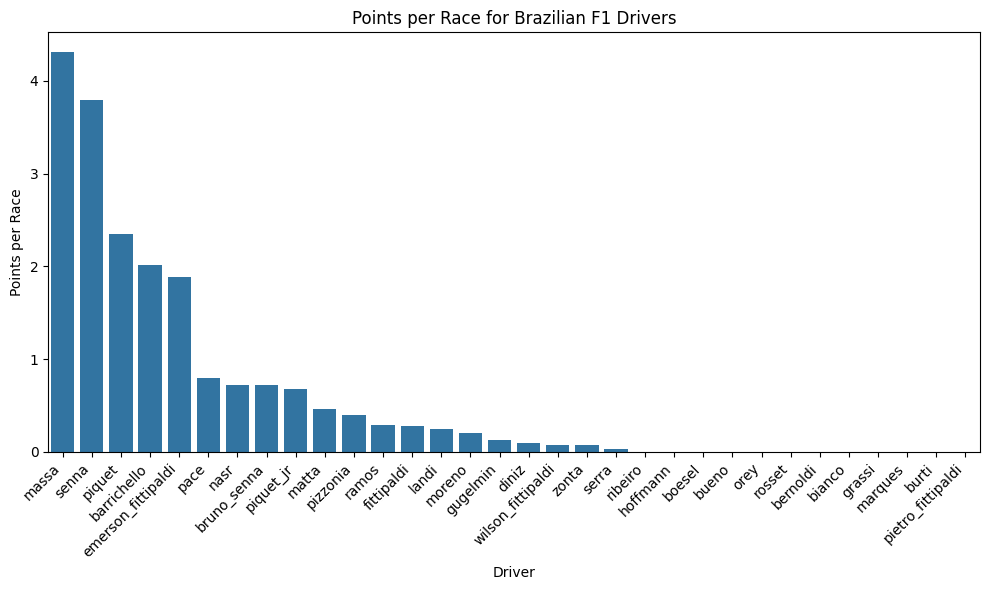

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='driverRef', y='points_per_race', data=driver_points_races.sort_values(by=['points_per_race'], ascending=False))
plt.title('Points per Race for Brazilian F1 Drivers')
plt.xlabel('Driver')
plt.ylabel('Points per Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Após uma análise dos dados, identifiquei que a pontuação era diferente,
# então igualei tudo para a base das pontuações atuais

points_per_position = {
    'position': ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'),
    'points': (25, 18, 15, 12, 10, 8, 6, 4, 2, 1)
}

points_df = pd.DataFrame(points_per_position)
points_df

,position,points
0,1,25
1,2,18
2,3,15
3,4,12
4,5,10
5,6,8
6,7,6
7,8,4
8,9,2
9,10,1


In [ ]:
position_points_map = dict(zip(points_df['position'], points_df['points']))
print(position_points_map)

{'1': 25, '2': 18, '3': 15, '4': 12, '5': 10, '6': 8, '7': 6, '8': 4, '9': 2, '10': 1}


In [ ]:
# Pontos Atuais para todas as corridas

results_df['points'] = results_df['position'].map(position_points_map).fillna(results_df['points'])
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,25.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,18.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,15.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,12.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,10.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [ ]:
# Mesclando com os pilotos para identificação de pontuação individual
results_with_nationality = pd.merge(results_df, drivers_df[['driverId', 'nationality']], on='driverId', how='left')

# Filtrando brasileiros
brazilian_results = results_with_nationality[results_with_nationality['nationality'] == 'Brazilian']

# Identificando pontuação dos pilotos brasileiros por equipe (e a soma dos pontos)
constructor_points = brazilian_results.groupby(['constructorId', 'driverId'])['points'].sum().reset_index()

# Achando o máximo de pontos por construtor
max_points_by_constructor = constructor_points.loc[constructor_points.groupby('constructorId')['points'].idxmax()]

print(max_points_by_constructor)

    constructorId  driverId  points
0               1       102  1324.0
7               3       137   445.0
9               4        12    50.0
11              6        13  1221.0
15              7        43    45.0
16             11        22   118.0
17             15        13   129.0
20             16        41    42.0
21             17        22   233.0
27             18       104    58.0
28             19        42     5.0
30             20        54     5.0
32             21        64    41.0
35             22       137   284.0
36             23        22   196.0
37             24        22   139.0
38             25        73     4.0
39             26        73     0.0
40             27        64    28.0
42             28        64    10.0
45             29       104    42.0
47             32       102   487.0
50             34       137   766.0
53             37       127    75.0
57             38        90     0.0
58             39        90     8.0
59             41       127 

In [ ]:
# Traduzindo os ID's para nomes de pilotos e equipes

constructor_df = pd.read_csv(directory_path + '/constructors.csv')
constructors_df = pd.merge(max_points_by_constructor, constructor_df[['constructorId', 'name']], on='constructorId', how='left')
max_points_with_names = pd.merge(max_points_by_constructor, drivers_df[['driverId', 'driverRef']], on='driverId', how='left')
max_points_with_names = pd.merge(max_points_with_names, constructors_df[['constructorId', 'name']], on='constructorId', how='left')

print(max_points_with_names[['name','driverRef', 'points']])

                         name           driverRef  points
0                     McLaren               senna  1324.0
1                    Williams              piquet   445.0
2                     Renault           piquet_jr    50.0
3                     Ferrari               massa  1221.0
4                      Toyota               matta    45.0
5                       Honda         barrichello   118.0
6                      Sauber               massa   129.0
7                         BAR               zonta    42.0
8                      Jordan         barrichello   233.0
9                     Minardi          fittipaldi    58.0
10                     Jaguar            pizzonia     5.0
11                      Prost               burti     5.0
12                     Arrows               diniz    41.0
13                   Benetton              piquet   284.0
14                      Brawn         barrichello   196.0
15                    Stewart         barrichello   139.0
16            

In [ ]:
# Total de Pontos por Piloto Brasileiro

brazilian_results = results_with_nationality[results_with_nationality['nationality'] == 'Brazilian']

brazilian_driver_points = brazilian_results.groupby('driverId')['points'].sum().reset_index()

brazilian_driver_points = pd.merge(brazilian_driver_points, drivers_df[['driverId', 'driverRef']], on='driverId', how='left').sort_values(by='points', ascending=False)

print(brazilian_driver_points[['driverRef', 'points']])

             driverRef  points
2          barrichello  1897.0
12               senna  1881.0
1                massa  1683.0
15              piquet  1678.0
18  emerson_fittipaldi   994.0
20                pace   257.0
9                diniz   124.0
14            gugelmin   120.0
13          fittipaldi   100.0
11              moreno    81.0
0            piquet_jr    50.0
3                zonta    49.0
5                matta    45.0
22   wilson_fittipaldi    38.0
29         bruno_senna    33.0
16               serra    32.0
4             pizzonia    29.0
30                nasr    29.0
25               landi    18.0
26               ramos    18.0
17              boesel    16.0
10              rosset    12.0
6                burti    10.0
19             ribeiro     8.0
8             bernoldi     7.0
21            hoffmann     6.0
7              marques     5.0
24                orey     1.0
23               bueno     0.0
27              bianco     0.0
28              grassi     0.0
31   pie

In [ ]:
races_per_driver = brazilian_results.groupby('driverId')['raceId'].nunique().reset_index()
races_per_driver.rename(columns={'raceId': 'num_races'}, inplace=True)

driver_points_races = pd.merge(brazilian_driver_points, races_per_driver, on='driverId', how='left')

driver_points_races['points_per_race'] = driver_points_races['points'] / driver_points_races['num_races']

print(driver_points_races[['driverRef', 'points_per_race']].sort_values(by=['points_per_race'], ascending=False))

             driverRef  points_per_race
1                senna        11.611111
3               piquet         8.106280
4   emerson_fittipaldi         6.671141
2                massa         6.210332
0          barrichello         5.819018
5                 pace         3.520548
18               landi         3.000000
19               ramos         2.571429
8           fittipaldi         2.325581
10           piquet_jr         1.785714
12               matta         1.607143
7             gugelmin         1.500000
16            pizzonia         1.450000
11               zonta         1.289474
6                diniz         1.252525
9               moreno         1.094595
13   wilson_fittipaldi         1.000000
15               serra         1.000000
25            hoffmann         1.000000
17                nasr         0.725000
14         bruno_senna         0.717391
22               burti         0.666667
20              boesel         0.533333
21              rosset         0.400000


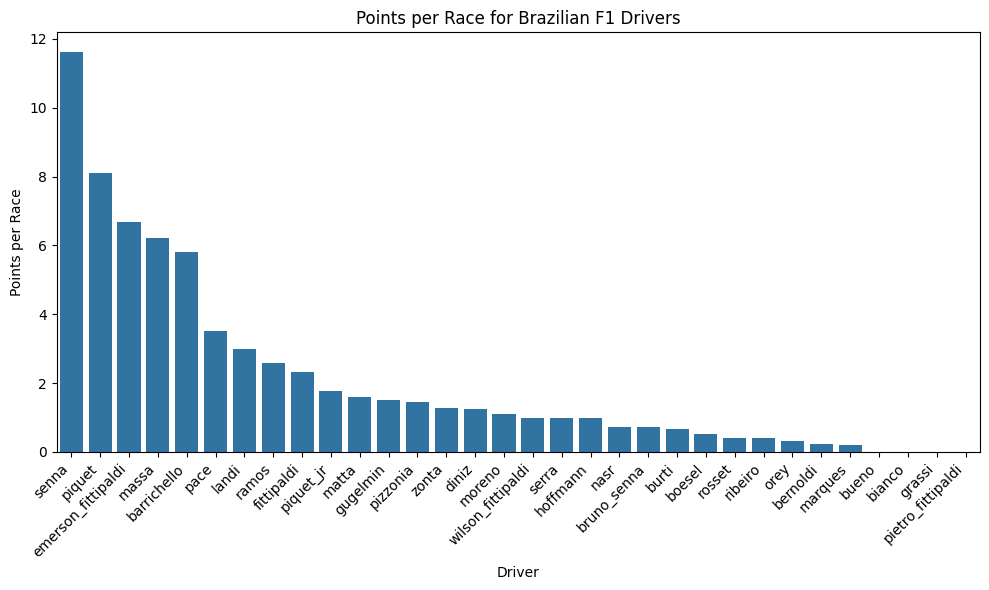

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='driverRef', y='points_per_race', data=driver_points_races.sort_values(by=['points_per_race'], ascending=False))
plt.title('Points per Race for Brazilian F1 Drivers')
plt.xlabel('Driver')
plt.ylabel('Points per Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
driver_points_races = pd.merge(brazilian_driver_points, races_per_driver, on='driverId', how='left')
print(driver_points_races[['driverRef', 'num_races']].sort_values(by=['num_races'], ascending=False))

             driverRef  num_races
0          barrichello        326
2                massa        271
3               piquet        207
1                senna        162
4   emerson_fittipaldi        149
6                diniz         99
7             gugelmin         80
9               moreno         74
5                 pace         73
14         bruno_senna         46
8           fittipaldi         43
17                nasr         40
13   wilson_fittipaldi         38
11               zonta         38
15               serra         32
20              boesel         30
21              rosset         30
24            bernoldi         29
12               matta         28
10           piquet_jr         28
26             marques         26
23             ribeiro         20
16            pizzonia         20
30              grassi         19
22               burti         15
19               ramos          7
25            hoffmann          6
18               landi          6
29            

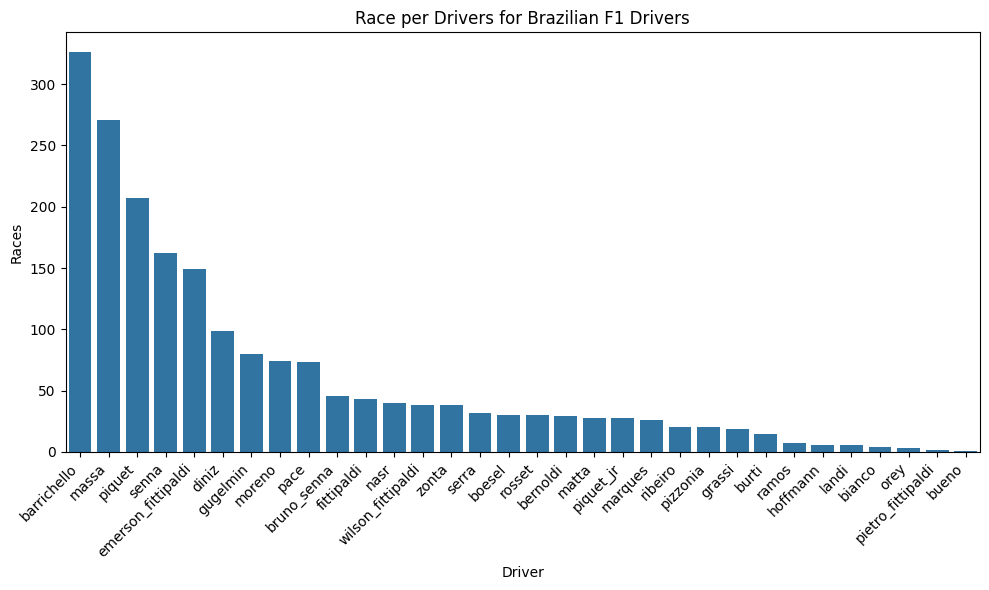

In [ ]:
Xplt.figure(figsize=(10, 6))
sns.barplot(x='driverRef', y='num_races', data=driver_points_races.sort_values(by=['num_races'], ascending=False))
plt.title('Race per Drivers for Brazilian F1 Drivers')
plt.xlabel('Driver')
plt.ylabel('Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()